In [2]:
!pip install shap --user


In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Life Expectancy Data.csv')

In [5]:
data.head(5)

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [6]:
data.shape

(2938, 22)

In [7]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [8]:
for cols in data.columns:
    if data[cols].isnull().sum() > 0:
        print(cols)


Life expectancy 
Adult Mortality
Alcohol
Hepatitis B
 BMI 
Polio
Total expenditure
Diphtheria 
GDP
Population
 thinness  1-19 years
 thinness 5-9 years
Income composition of resources
Schooling


In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

for cols in data.columns:
    if data[cols].isnull().sum() > 0:
        data[cols] = imputer.fit_transform(data[[cols]])


Text(0.5, 0.98, 'Boxplots of Numerical Columns')

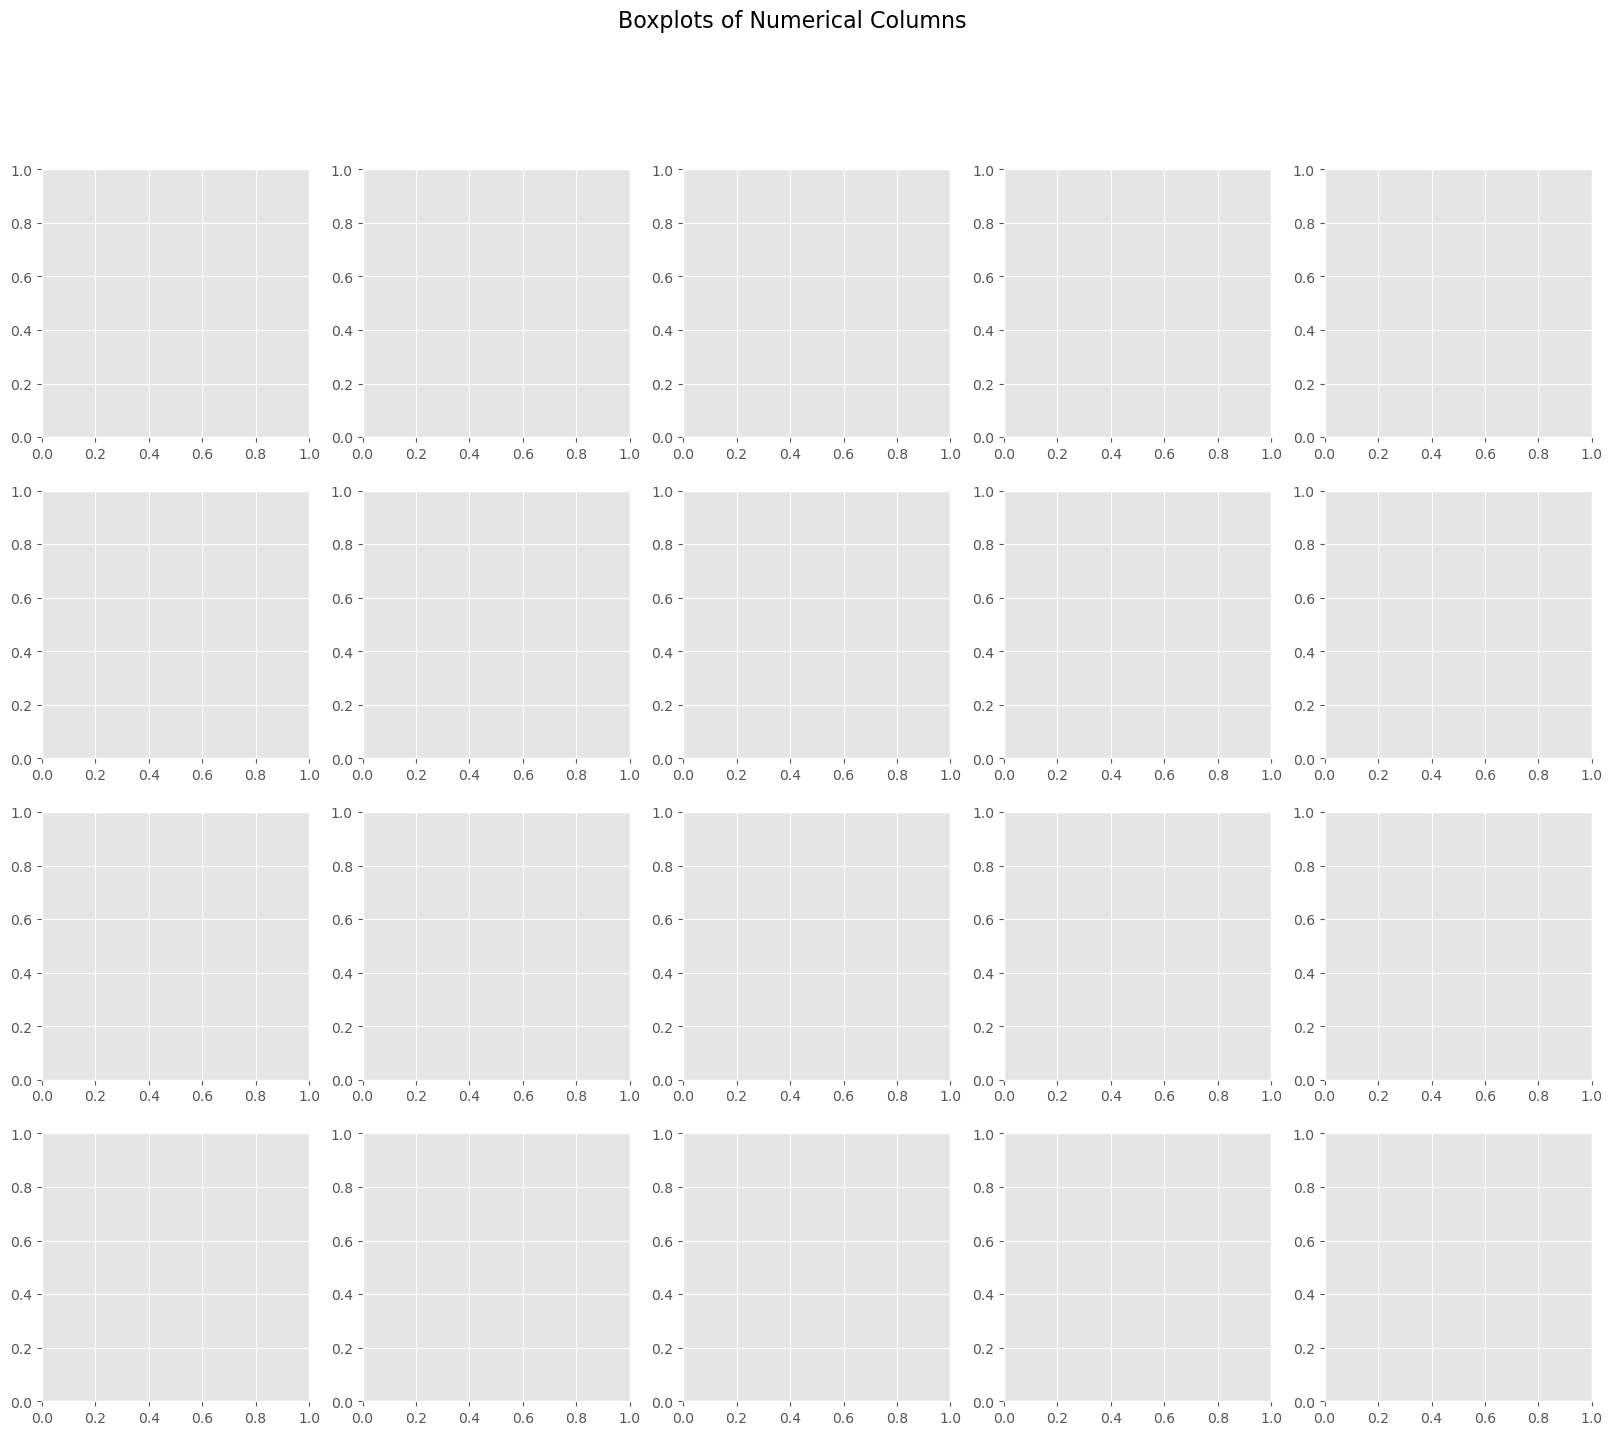

In [10]:
numerical_cols = data.select_dtypes(include=['float64','int64']).columns
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)

In [11]:
axes = axes.flatten()

In [12]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


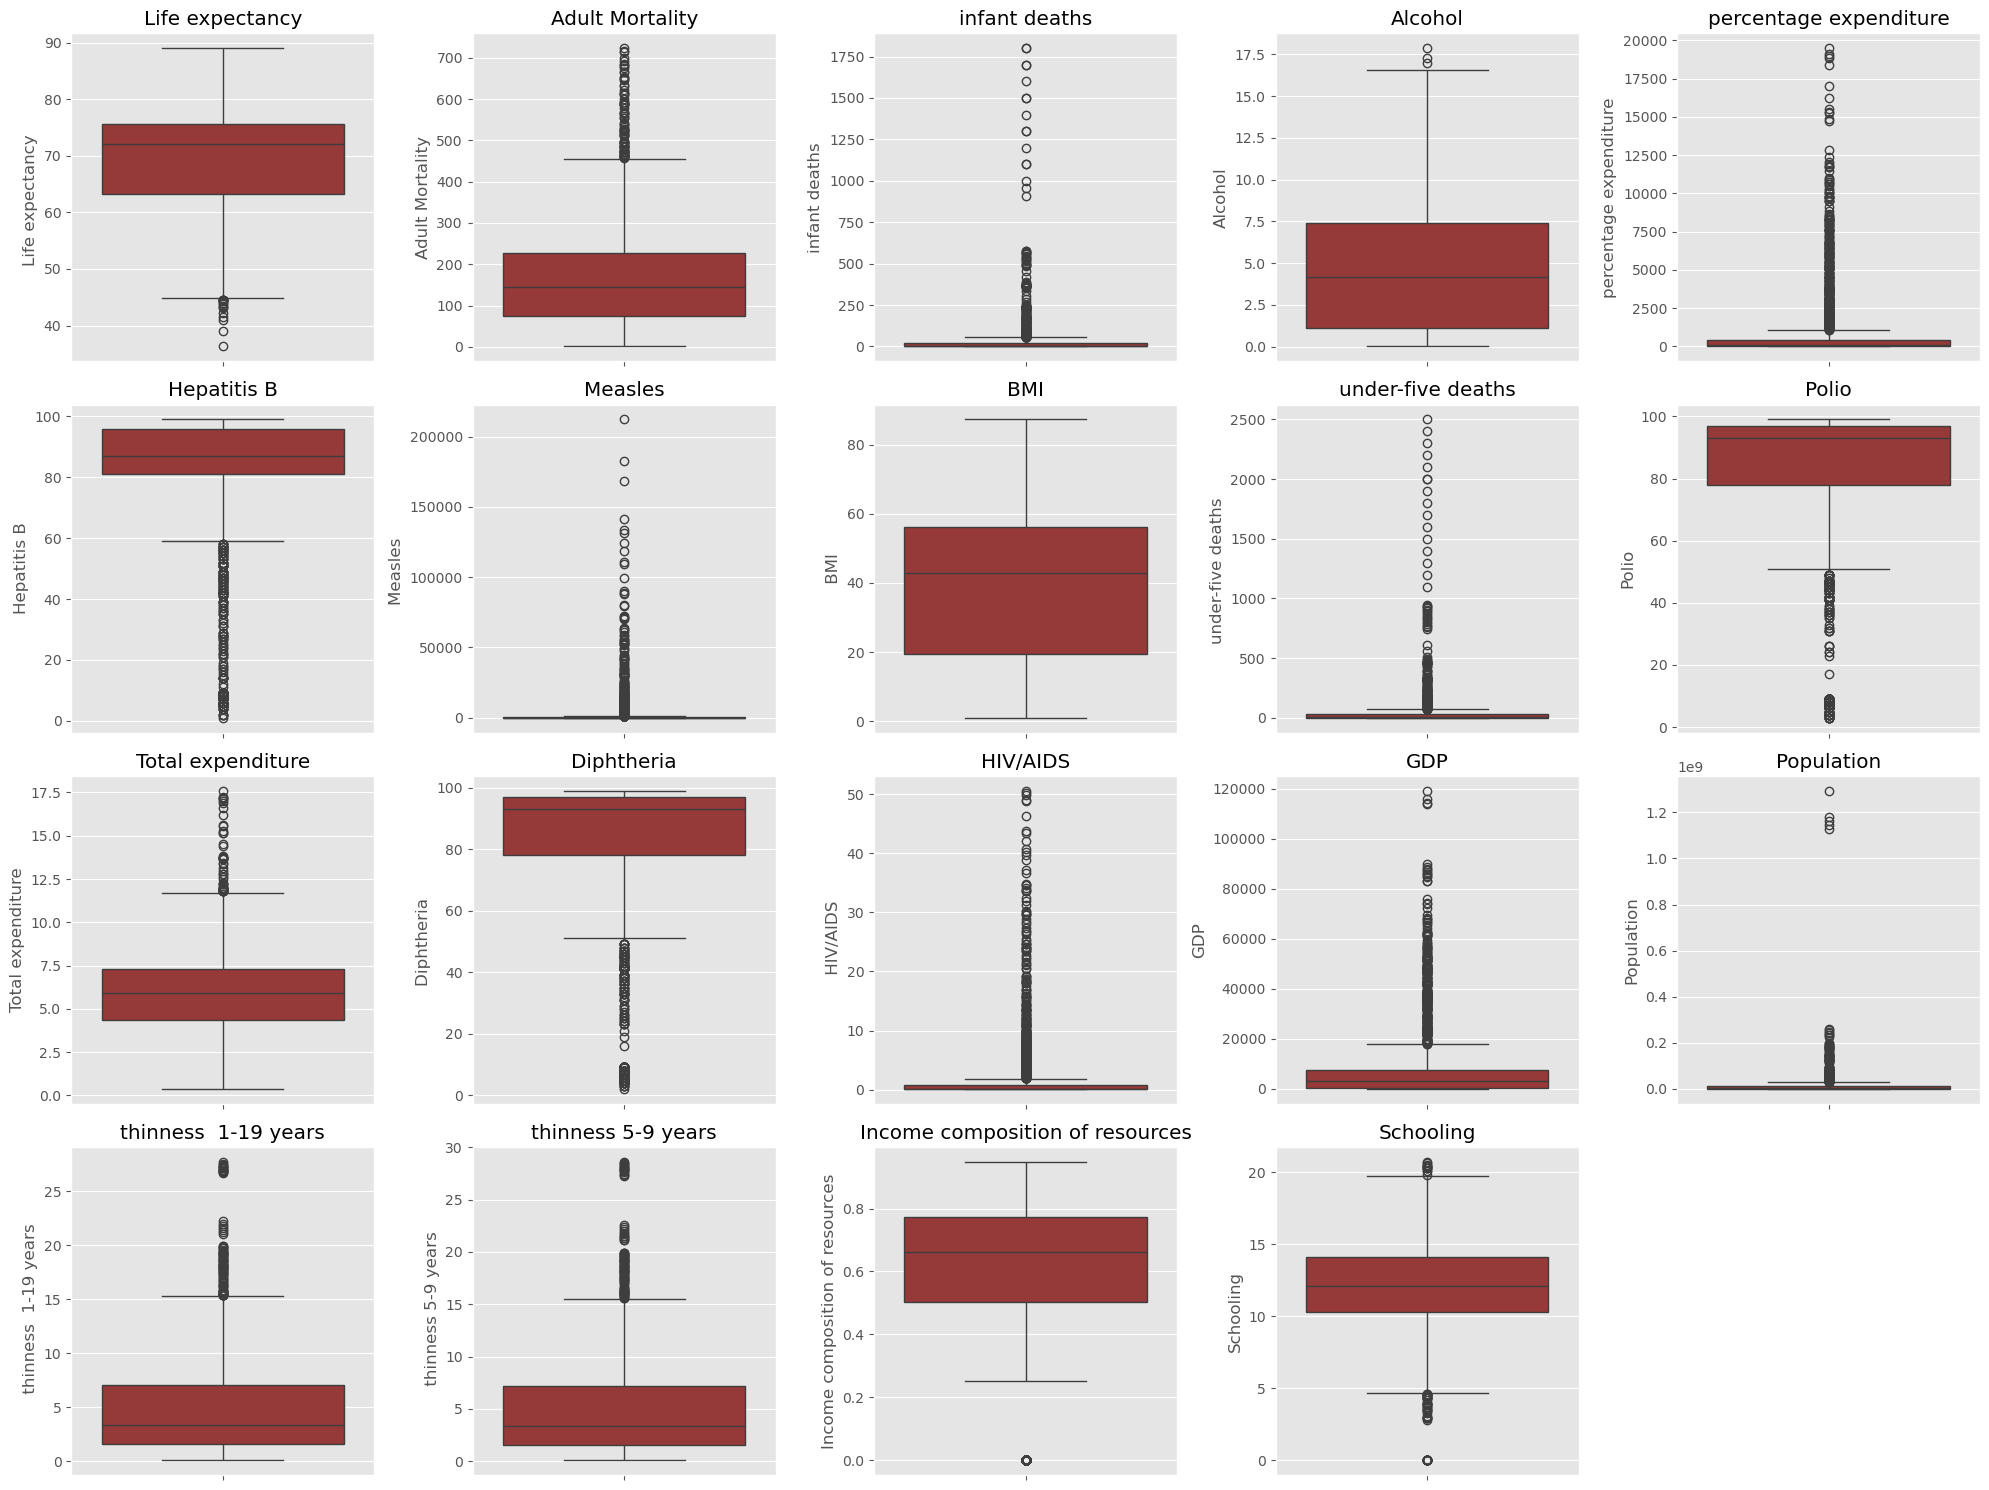

In [13]:
columns_to_plot = [
    'Life expectancy ',
    'Adult Mortality',
    'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
    'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
    'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
    ' thinness  1-19 years', ' thinness 5-9 years',
    'Income composition of resources', 'Schooling',
]

n_cols = 5
n_rows = (len(columns_to_plot) + n_cols - 1) // n_cols  # Ceiling division
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))
axes = axes.flatten()  # Convert to 1D for easy indexing

for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=data[col], ax=axes[i], color='brown')
    axes[i].set_title(col.strip())

# Turn off any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [14]:
for j in range(len(numerical_cols), len(axes)):fig.delaxes(axes[j])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 640x480 with 0 Axes>

In [15]:
outlier_cols = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ',
'Polio',
'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
'Population',
' thinness 1-19 years', ' thinness 5-9 years',
'Income composition of resources', 'Schooling'
]

In [16]:



outlier_cols = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure']

for col_name in outlier_cols:
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data[col_name] < lower_bound) | (data[col_name] > upper_bound)]
    print(f"{col_name} - Number of outliers: {len(outliers)}")


Adult Mortality - Number of outliers: 86
infant deaths - Number of outliers: 315
Alcohol - Number of outliers: 3
percentage expenditure - Number of outliers: 389


In [17]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [18]:
data[col_name] = np.where((data[col_name] > upper_bound) |
(data[col_name] < lower_bound),
np.mean(data[col_name]),
data[col_name])

In [19]:
data.shape

(2938, 22)

Text(0.5, 0.98, 'Boxplots of Numerical Columns')

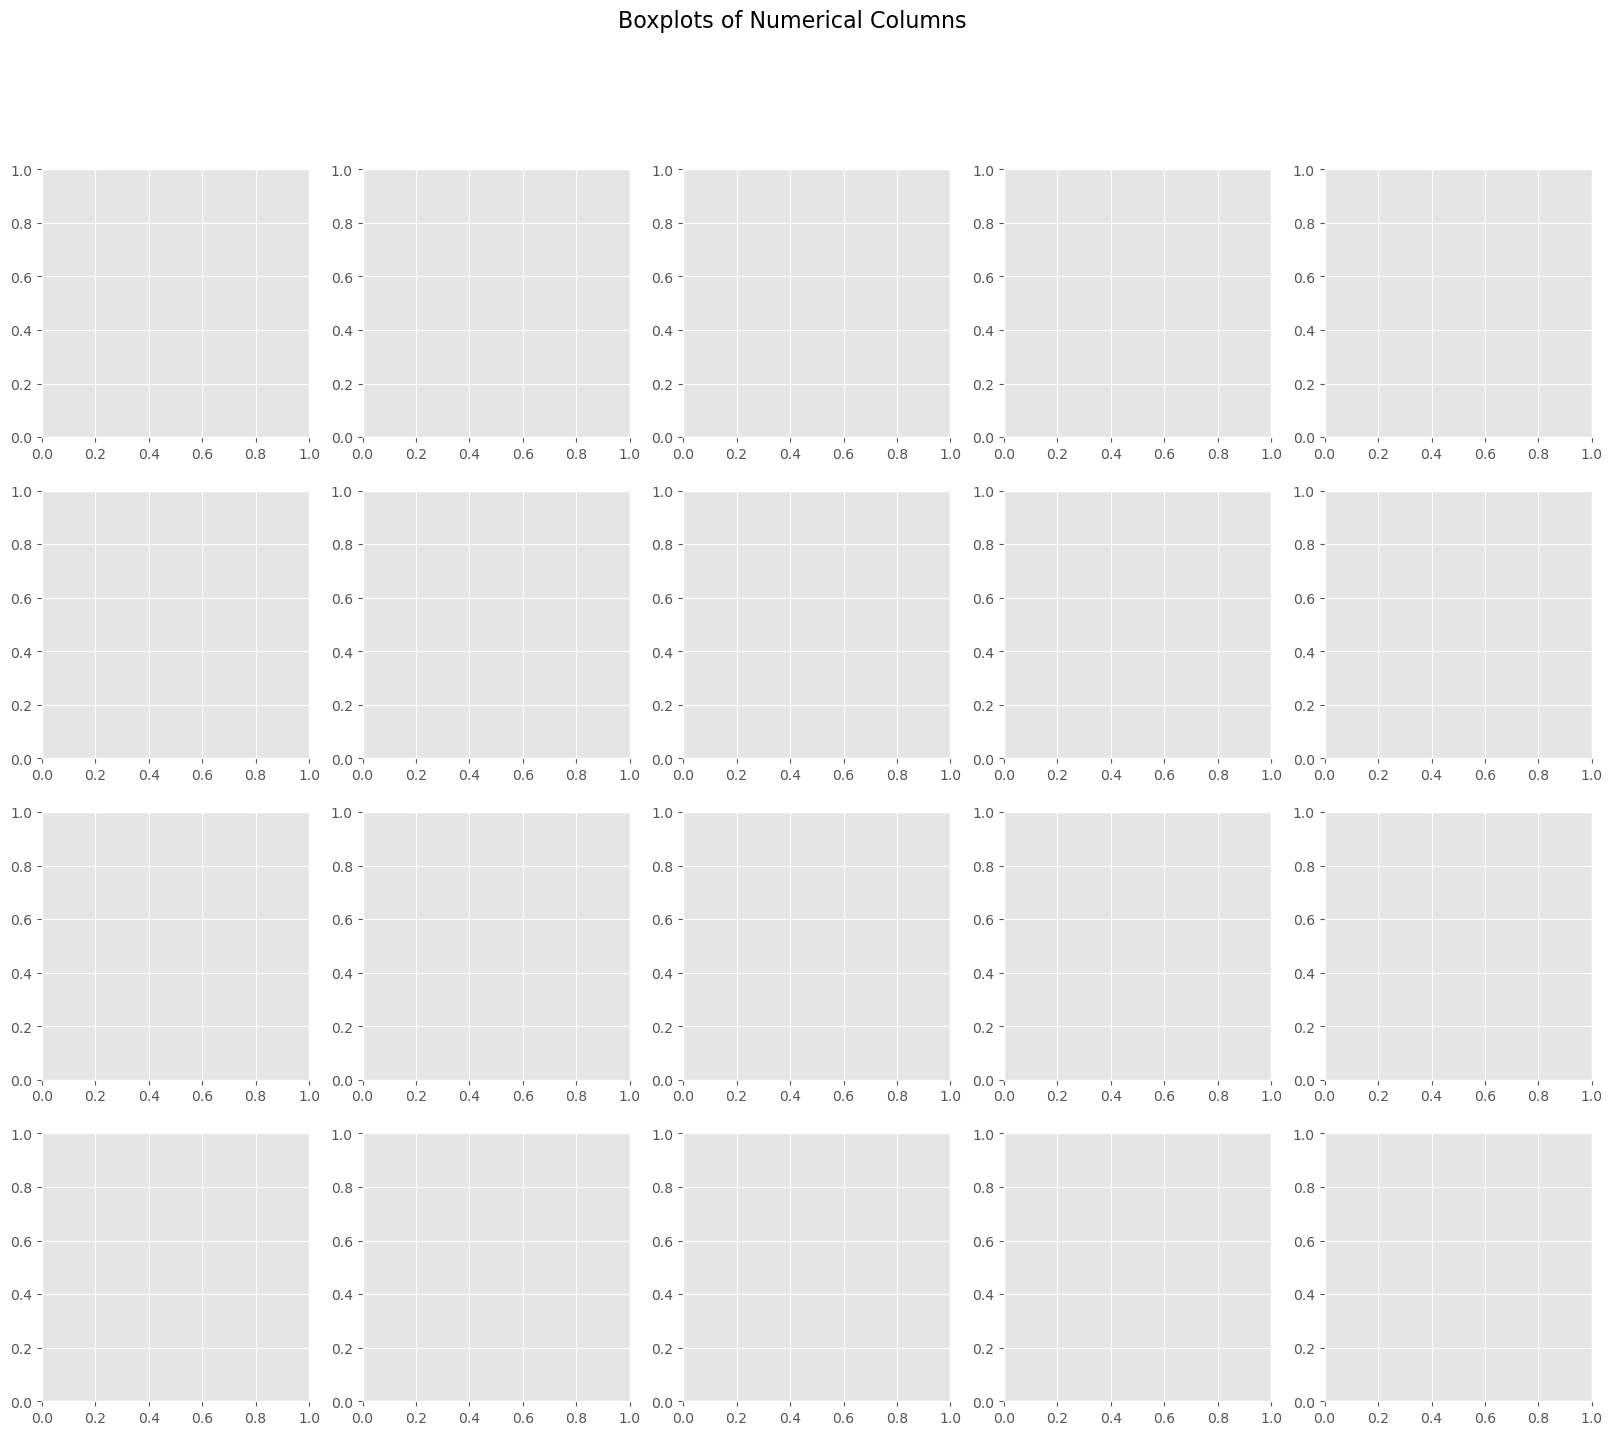

In [20]:

numerical_cols = data.select_dtypes(include=['float64','int64']).columns
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns', fontsize=16)

In [21]:
axes = axes.flatten()

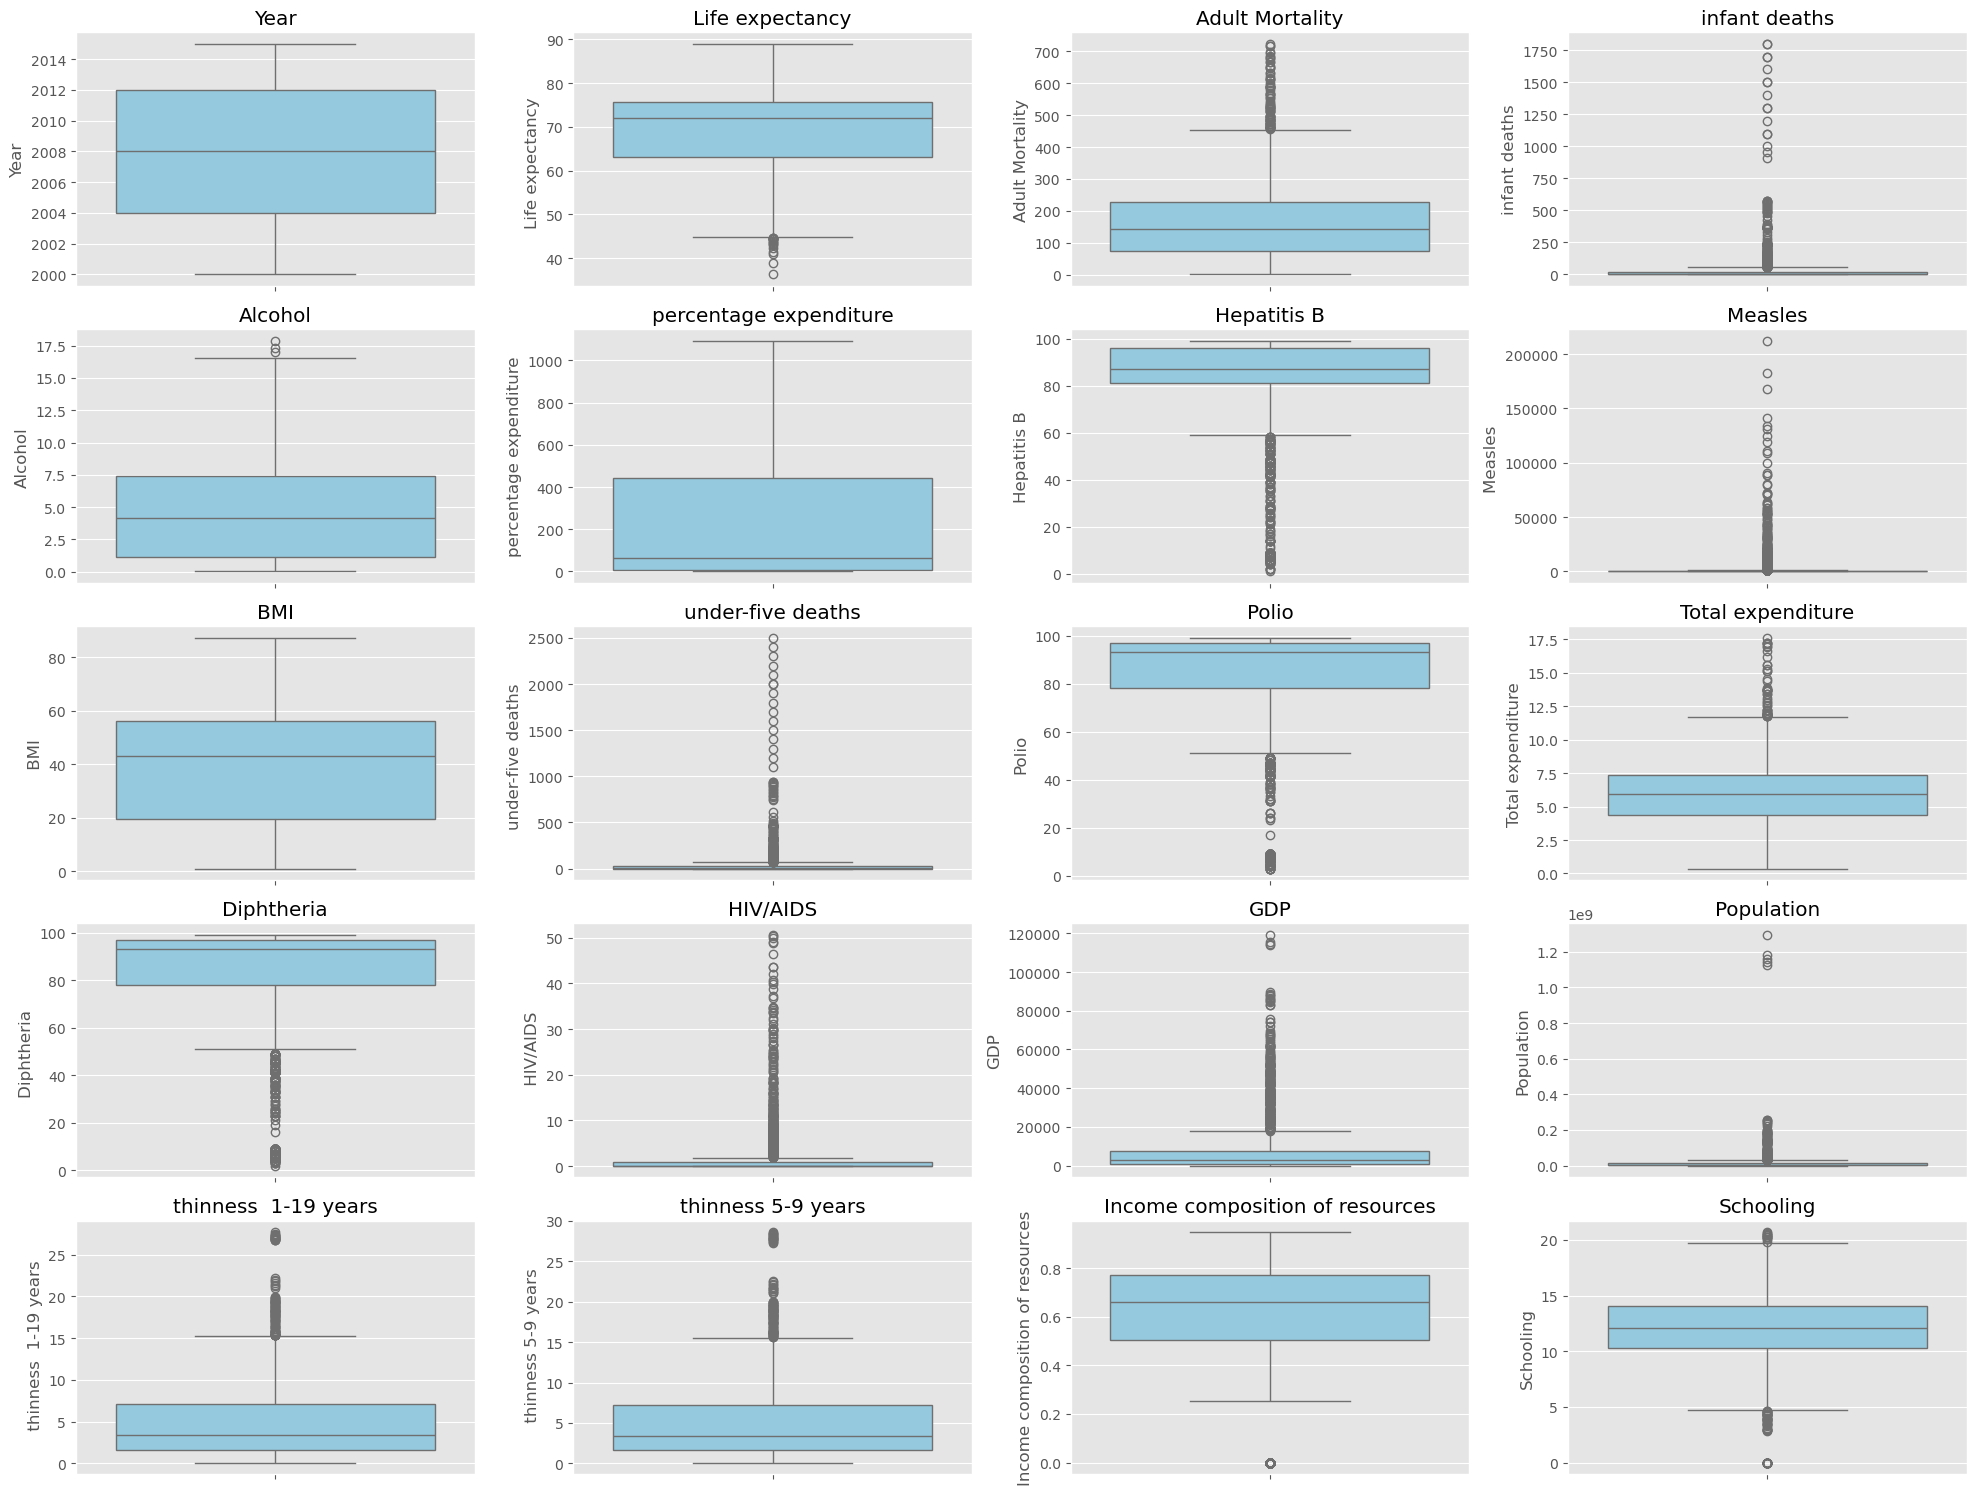

In [22]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

n_cols = 4
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=data[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col.strip())

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [23]:
for j in range(len(numerical_cols), len(axes)):fig.delaxes(axes[j])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 640x480 with 0 Axes>

In [24]:
data.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [25]:
data.Country.value_counts()

Country
Afghanistan              16
Albania                  16
Algeria                  16
Angola                   16
Antigua and Barbuda      16
                         ..
Monaco                    1
Marshall Islands          1
Saint Kitts and Nevis     1
San Marino                1
Tuvalu                    1
Name: count, Length: 193, dtype: int64

In [26]:
average_life_expectancy = data.groupby('Year')['Life expectancy '].mean().reset_index()


In [27]:
fig = px.line(average_life_expectancy, x='Year', y='Life expectancy ',
title='Average Life Expectancy over the Years',
labels={'Year':'Year', 'Life expectancy':'Life Expectancy (years)'},
template='plotly_dark')

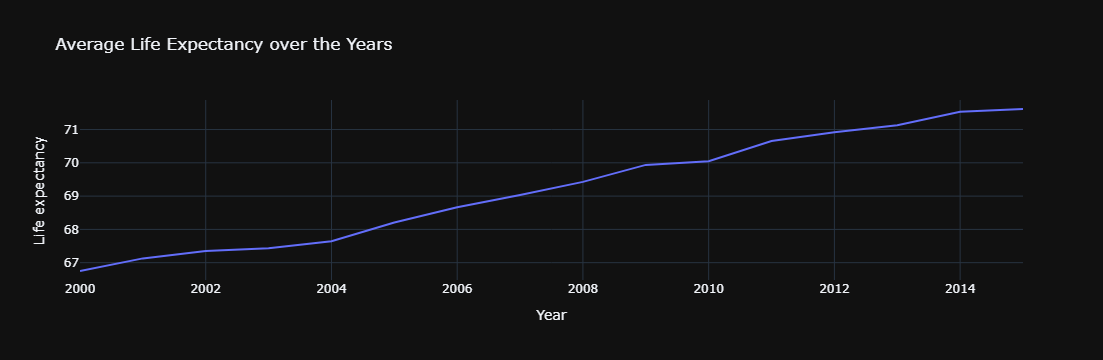

In [28]:
fig.show()

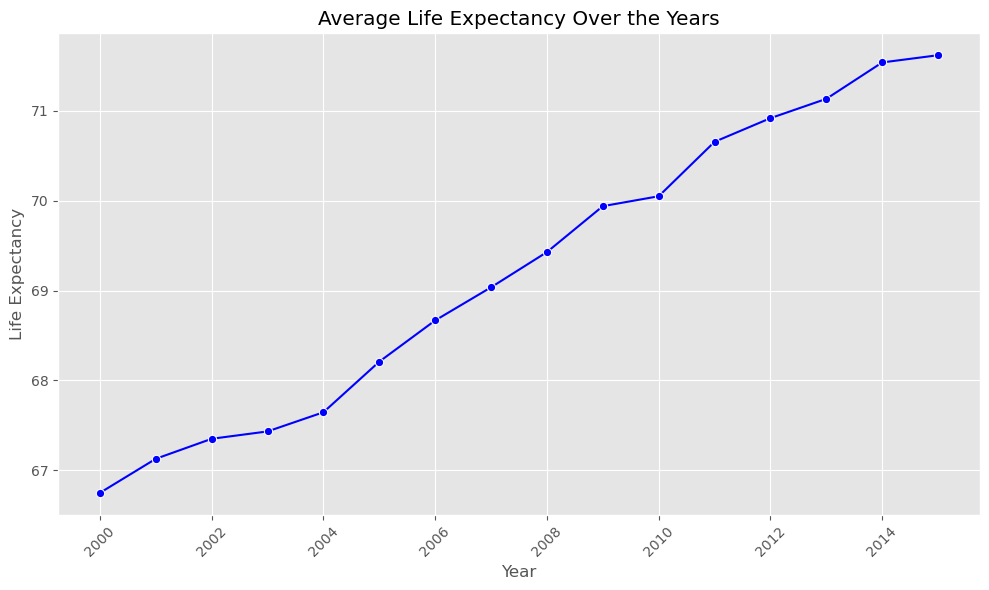

In [29]:

average_life_expectancy.columns = average_life_expectancy.columns.str.strip()

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_life_expectancy, x='Year', y='Life expectancy', marker='o', color='blue')
plt.title('Average Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



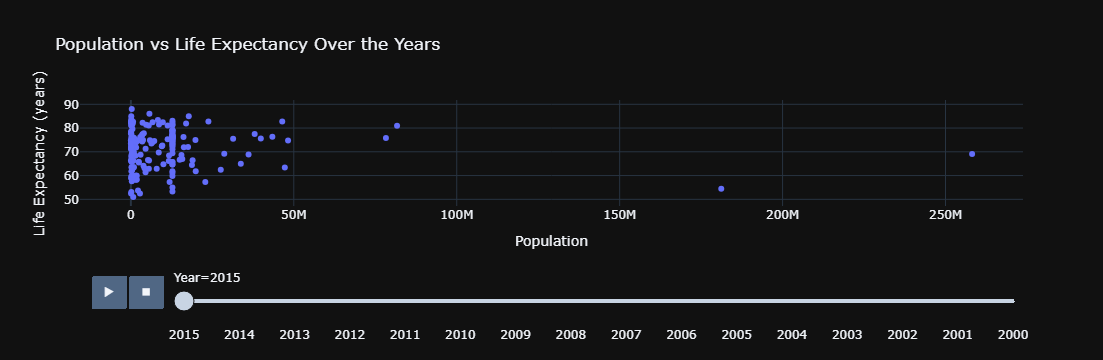

In [30]:
data.columns = data.columns.str.strip()

fig = px.scatter(
    data,
    x='Population',
    y='Life expectancy',
    hover_name='Country',
    animation_frame='Year',
    title='Population vs Life Expectancy Over the Years',
    labels={
        'Population': 'Population',
        'Life expectancy': 'Life Expectancy (years)'
    },
    template='plotly_dark',
    size_max=60
)

fig.show()


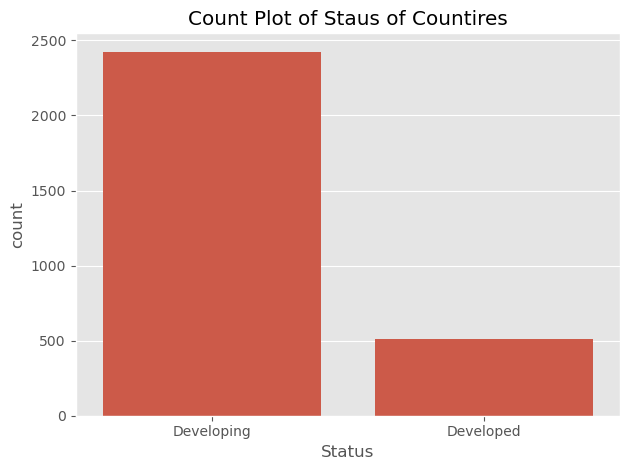

In [31]:
sns.countplot(x=data['Status'])
plt.title('Count Plot of Staus of Countires')
plt.tight_layout()
plt.show()

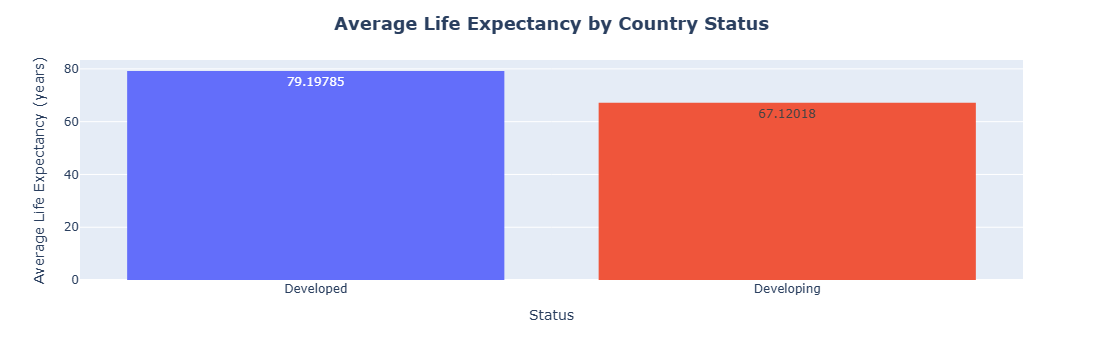

In [32]:
data.columns = data.columns.str.strip()

# Group by 'Status' and compute mean life expectancy
life_expact_status = data.groupby('Status')['Life expectancy'].mean().reset_index()

# Create histogram
fig = px.histogram(
    life_expact_status,
    x='Status',
    y='Life expectancy',
    color='Status',
    text_auto=True
)

# Update layout with better title
fig.update_layout(
    title=dict(
        text='<b>Average Life Expectancy by Country Status</b>',
        x=0.5,
        font=dict(size=18)
    ),
    xaxis_title='Status',
    yaxis_title='Average Life Expectancy (years)',
    showlegend=False
)

fig.show()


In [33]:
average_data = data.groupby('Year').agg({
    'Life expectancy': 'mean',
    'Alcohol': 'mean'
}).reset_index()


In [34]:
fig = go.Figure()

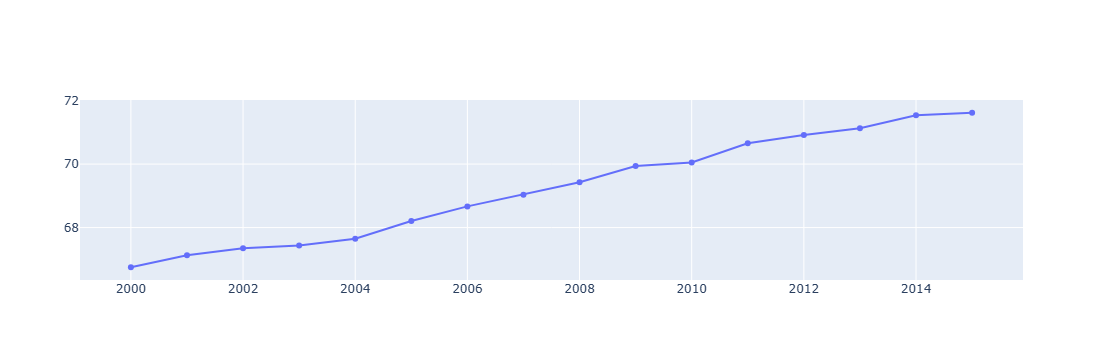

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=average_data['Year'],
    y=average_data['Life expectancy'],
    mode='lines+markers',
    name='Life Expectancy',
    yaxis='y1'
))


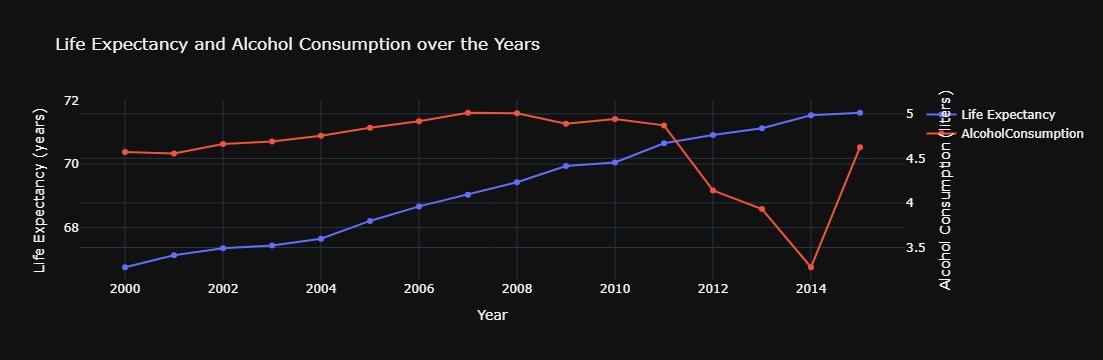

In [36]:
fig.add_trace(go.Scatter(x=average_data['Year'],
y=average_data['Alcohol'],
mode='lines+markers', name='AlcoholConsumption',
yaxis='y2'))
# Update layout for dual y-axes
fig.update_layout(
title='Life Expectancy and Alcohol Consumption over the Years',
xaxis=dict(title='Year'),
yaxis=dict(title='Life Expectancy (years)', side='left'),
yaxis2=dict(title='Alcohol Consumption (liters)',
side='right', overlaying='y'),
template='plotly_dark'
)
# Show the plot
fig.show()


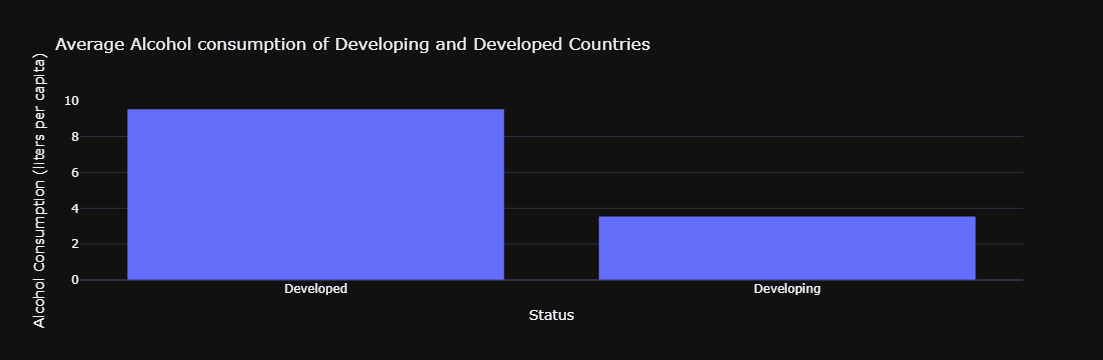

In [37]:
fig = px.bar(data.groupby('Status',
as_index=False).agg({'Alcohol':'mean'}), y='Alcohol',
x='Status',
title='Average Alcohol consumption of Developing and Developed Countries',
labels={'Alcohol':'Alcohol Consumption (liters per capita)', 'Life expectancy':'Life Expectancy (years)'},
template='plotly_dark')
# Show the plot
fig.show()

In [38]:
data.head(2)

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0                  17.2                17.3                            0.479   
1                  17.5                17.5                            0.476   

   Schooling  
0       10.1  
1       10.0  

[2 rows x 22 columns]

In [39]:
aggregated_data = data.groupby('Schooling')['Life expectancy'].mean().reset_index()

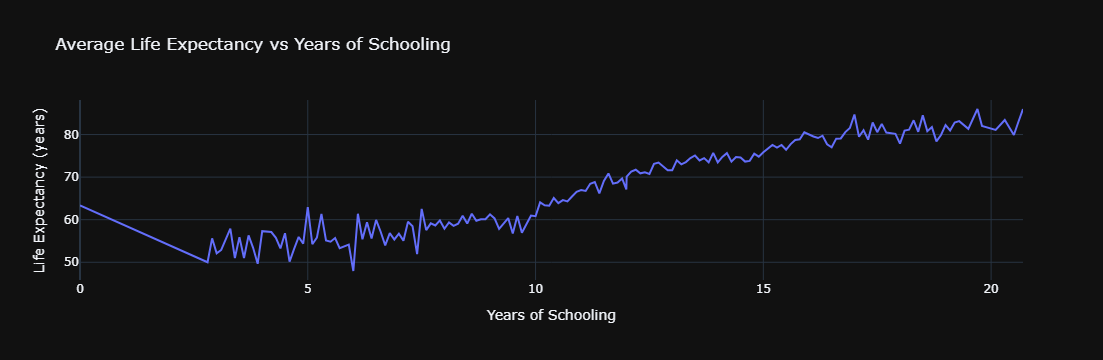

In [40]:
aggregated_data.columns = aggregated_data.columns.str.strip()

fig = px.line(
    aggregated_data,
    x='Schooling',
    y='Life expectancy',
    title='Average Life Expectancy vs Years of Schooling',
    labels={
        'Schooling': 'Years of Schooling',
        'Life expectancy': 'Life Expectancy (years)'
    },
    template='plotly_dark'
)

fig.show()


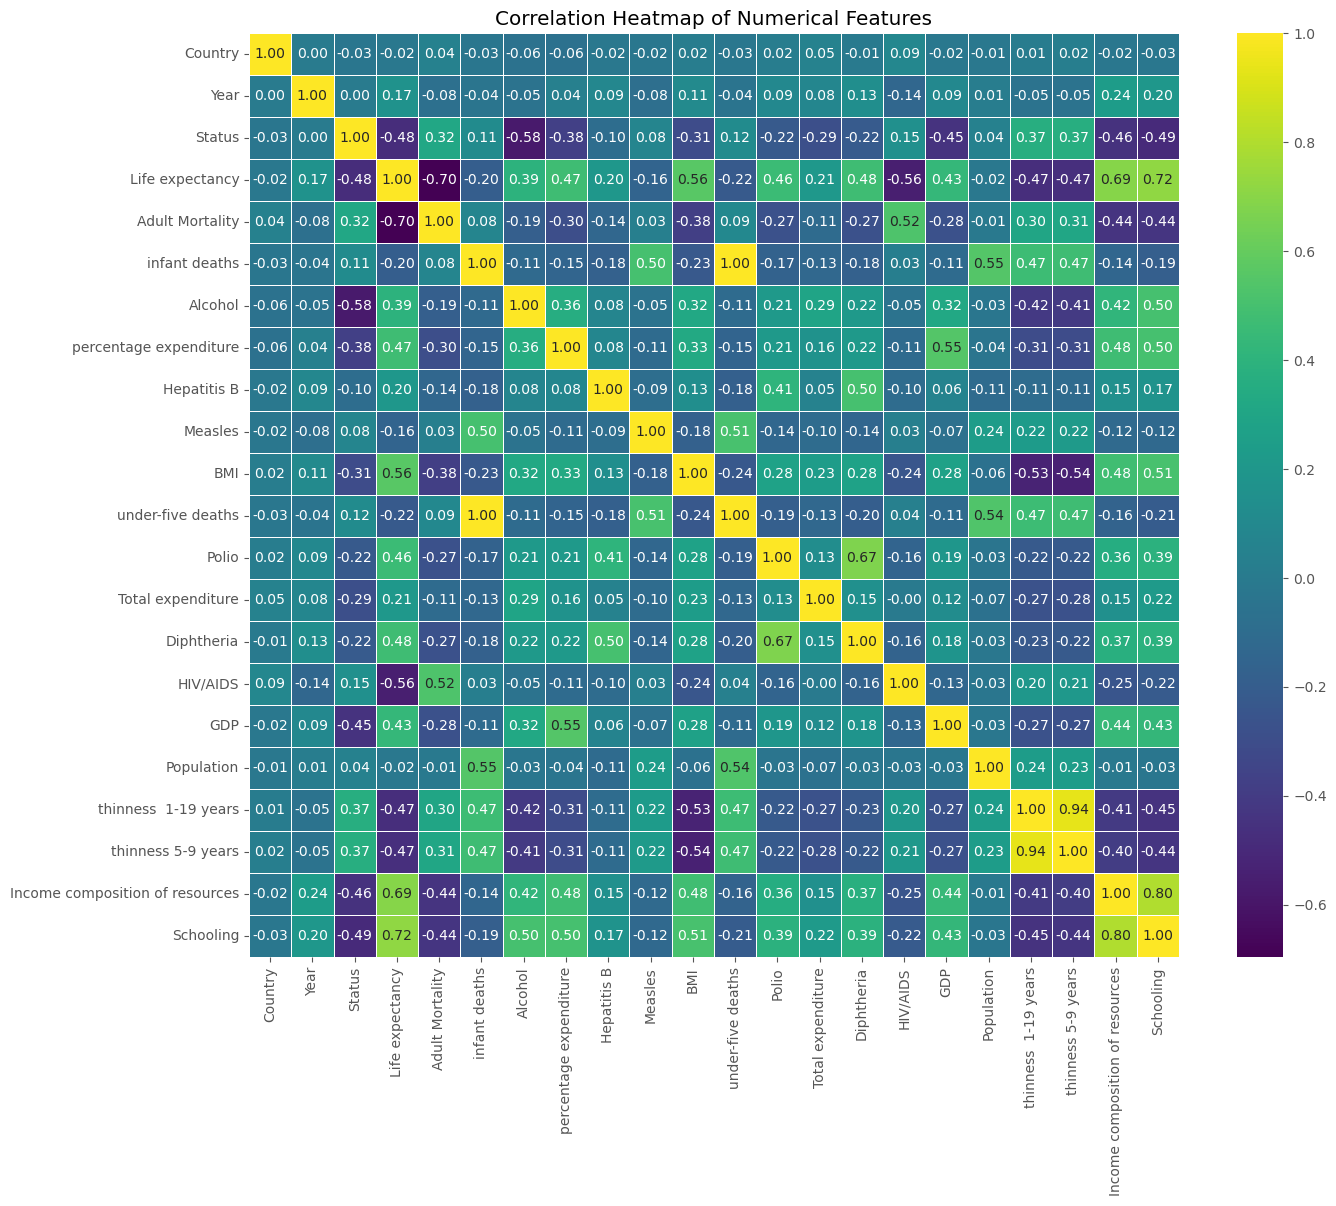

In [71]:
data.columns = data.columns.str.strip()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(15, 12))
sns.heatmap(data[numerical_cols].corr(), cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
cat_cols = data.select_dtypes(include='object').columns

for col in cat_cols:
    data[col] = le.fit_transform(data[col])


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Strip column names (optional but helpful)
data.columns = data.columns.str.strip()

# Define X and y
X = data.drop(columns='Life expectancy')
y = data['Life expectancy']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error: 14.84
R² Score: 0.83


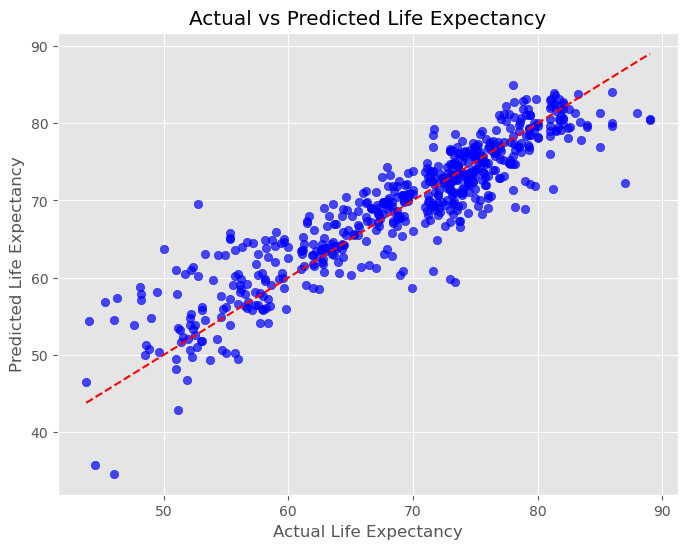

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs Predicted Life Expectancy")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.show()


In [46]:
data.columns = data.columns.str.strip()  # removes leading/trailing spaces
x = data.drop(columns='Life expectancy')
y = data['Life expectancy']


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


MSE: 14.839873658726214
R²: 0.8287086486191345


In [49]:
scaler = StandardScaler()
cols_to_scale = x.drop(columns='Status').columns

In [50]:
x[cols_to_scale] = scaler.fit_transform(x[cols_to_scale])

In [51]:
x.head()

Country      Year  Status  Adult Mortality  infant deaths   Alcohol  \
0 -1.691042  1.621762       1         0.791586       0.268824 -1.172958   
1 -1.691042  1.404986       1         0.856072       0.285786 -1.172958   
2 -1.691042  1.188210       1         0.831890       0.302749 -1.172958   
3 -1.691042  0.971434       1         0.864132       0.328193 -1.172958   
4 -1.691042  0.754658       1         0.888314       0.345155 -1.172958   

   percentage expenditure  Hepatitis B   Measles       BMI  ...     Polio  \
0               -0.553370    -0.705861 -0.110384 -0.964715  ... -3.278638   
1               -0.545858    -0.838704 -0.168124 -0.989810  ... -1.051482   
2               -0.546877    -0.750142 -0.173531 -1.014905  ... -0.880163   
3               -0.530255    -0.617299  0.032045 -1.040000  ... -0.666013   
4               -0.768242    -0.573018  0.051757 -1.060076  ... -0.623183   

   Total expenditure  Diphtheria  HIV/AIDS       GDP  Population  \
0           0.925806   -0.732952 -0.323445 -0.525248    0.389975   
1           0.934140   -0.859877 -0.323445 -0.523083   -0.230936   
2           0.913306   -0.775260 -0.323445 -0.521632    0.352715   
3           1.075815   -0.648335 -0.323445 -0.518723   -0.168315   
4           0.804966   -0.606027 -0.323445 -0.564893   -0.181666   

   thinness  1-19 years  thinness 5-9 years  Income composition of resources  \
0              2.813130            2.773279                        -0.725401   
1              2.881408            2.817902                        -0.740050   
2              2.926927            2.862526                        -0.769349   
3              2.972446            2.929461                        -0.803531   
4              3.040724            2.974085                        -0.847480   

   Schooling  
0  -0.579931  
1  -0.610570  
2  -0.641209  
3  -0.671847  
4  -0.763764  

[5 rows x 21 columns]

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [54]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
test_size = 0.2, random_state = 30)

In [55]:
print(f"Shape of X_train is: {x_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {x_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (2350, 21)
Shape of Y_train is: (2350,)

Shape of X_test is: (588, 21)
Shape of Y_test is: (588,)


In [56]:
models = {
'Random Forest': RandomForestRegressor(random_state=42),
'Extra Trees Regressor':
ExtraTreesRegressor(random_state=42),
'GradientBoost Regressor':
GradientBoostingRegressor(random_state=42),
'XGB Regressor': XGBRegressor()
}

In [57]:
results = []

In [58]:
for model_name, model in models.items():model.fit(x_train, y_train)

In [59]:
y_pred = model.predict(x_test)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

# Now print them
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Root Mean Squared Error (RMSE): 2.01
R² Score: 0.96


In [61]:
results.append({'Model': model_name, 'RMSE': rmse, 'R2Score': r2})
results_data = pd.DataFrame(results)

In [62]:
results_data=results_df.sort_values("R2Score", ascending =False)
results_data

NameError: name 'results_df' is not defined

In [ ]:
import pandas as pd

results_data = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R2 Score': [0.82, 0.89, 0.91]
})


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.pointplot(x='Model', y='R2 Score', data=results_data)
plt.xticks(rotation=90)
plt.title('Model Comparison: R2 Score')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

results_data = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R2 Score': [0.82, 0.89, 0.91],
    'RMSE': [3.5, 2.8, 2.4]
})


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.pointplot(x='Model', y='RMSE', data=results_data)
plt.xticks(rotation=90)
plt.title('Model Comparison: RMSE')
plt.tight_layout()
plt.show()


In [63]:
from sklearn.model_selection import cross_val_score, KFold
best_model = XGBRegressor()
kf = KFold(n_splits=20, shuffle=True, random_state=42)
cross_val = cross_val_score(best_model, x, y, cv= kf,
scoring='r2')
cross_val

array([0.96761122, 0.96215349, 0.97876818, 0.96127451, 0.97198786,
       0.95556296, 0.96516363, 0.9632928 , 0.97627652, 0.95322038,
       0.96475454, 0.96942222, 0.96712321, 0.96087108, 0.97032795,
       0.95274227, 0.95779616, 0.96474001, 0.96265868, 0.95891991])

Text(0.5, 1.0, 'Cross Validation scores')

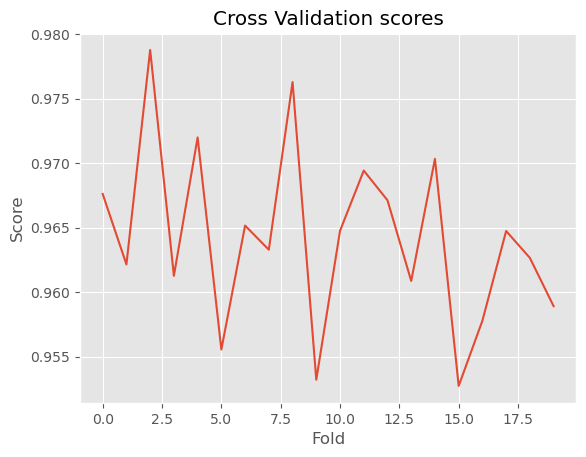

In [64]:
plt.plot(cross_val)
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title("Cross Validation scores")

In [65]:
cross_val.mean()

np.float64(0.9642333794084852)

In [66]:
from xgboost import XGBRegressor

best_model = XGBRegressor()
best_model.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

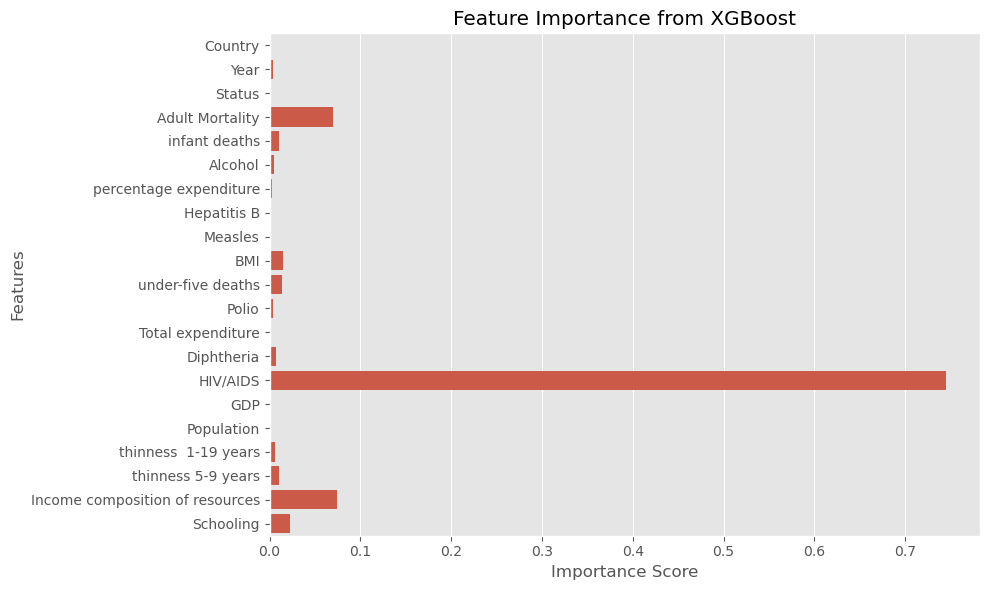

In [67]:
importances = best_model.feature_importances_
features = x.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance from XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [68]:
cross_val.std()

np.float64(0.006810217002392424)

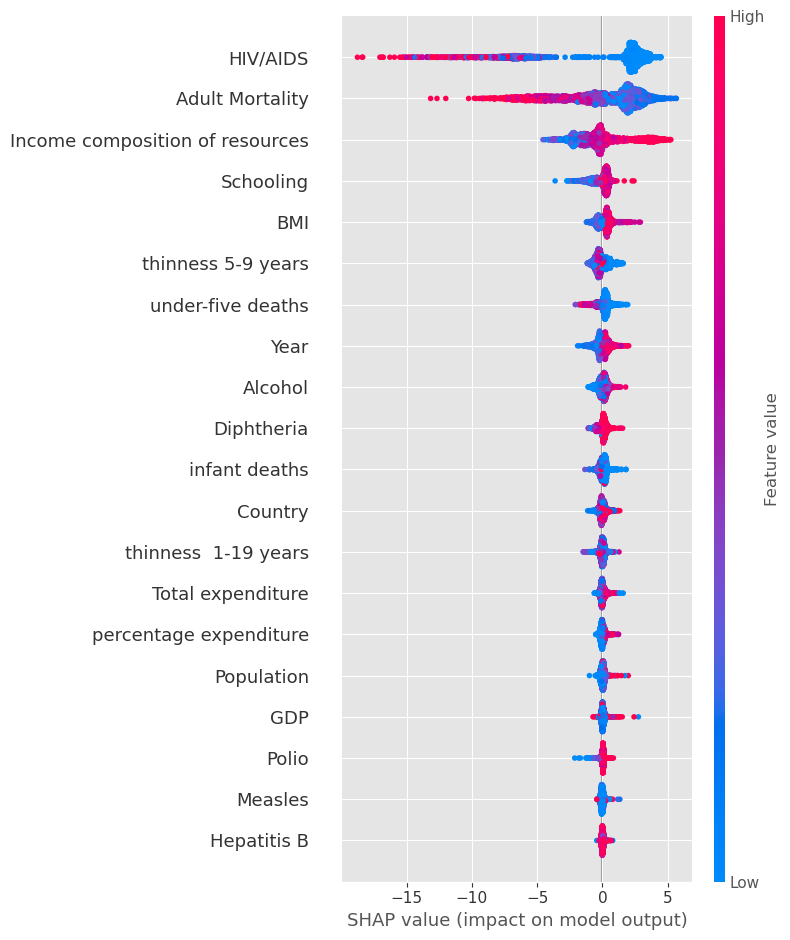

In [70]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(best_model)

# Calculate SHAP values
shap_values = explainer(x)

# Plot SHAP summary
shap.summary_plot(shap_values, x)


In [75]:
import joblib
joblib.dump(best_model, "life_expectancy_model.pkl")


['life_expectancy_model.pkl']

In [88]:
print("Conclusion")
print("XGBoost delivered the highest performance with an R2 score of ~0.96, showing strong predictive power and consistency through cross-validation.")
print("Key influencing factors on life expectancy included:")
print("- Adult Mortality")
print("- Years of Schooling")
print("- Income Composition of Resources")
print("HIV/AIDS prevalence")



print("Resources")
print("HIV/AIDS prevalence")
print("The model suggests that developing countries can improve life expectancy by:")
print("Expanding access to education")
print("Increasing")

Conclusion
XGBoost delivered the highest performance with an R2 score of ~0.96, showing strong predictive power and consistency through cross-validation.
Key influencing factors on life expectancy included:
- Adult Mortality
- Years of Schooling
- Income Composition of Resources
HIV/AIDS prevalence
Resources
HIV/AIDS prevalence
The model suggests that developing countries can improve life expectancy by:
Expanding access to education
Increasing
